### Submitted By:
# Indrashis Paul
# 19MIM10046

# Importing required dependencies

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, pair_confusion_matrix, plot_precision_recall_curve
import torch
import torch.nn as nn

# Loading data

In [48]:
data = pd.read_csv('gender.csv')
print(data.shape)
data.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# Preprocessing
1. Label Encoding the Target Column
2. Standard scaling the numerical data 

In [50]:
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [53]:
scaler = MinMaxScaler()

std_col = ['forehead_width_cm','forehead_height_cm']
data[std_col] = scaler.fit_transform(data[std_col])
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0.097561,0.50,1,0,1,1,1
1,0,0.634146,0.15,0,0,1,0,0
2,0,0.097561,0.60,1,1,1,1,1
3,0,0.731707,0.50,0,1,1,1,1
4,1,0.512195,0.40,0,0,0,0,0


# Building the Perceptron for Classification

## Split data

In [54]:
X = data.drop('gender', axis=1)
y = data['gender']

## Using `sklearn.linear_model.Perceptron`

### 1. Default Parameters

In [21]:
# define model
model = Perceptron()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print(scores)
print(f'Mean Accuracy: {np.mean(scores)} ({np.std(scores)})')

[0.96606786 0.966      0.94       0.948      0.98       0.95
 0.962      0.962      0.974      0.958      0.97205589 0.952
 0.89       0.956      0.972      0.97       0.958      0.958
 0.958      0.914      0.94211577 0.964      0.96       0.966
 0.958      0.966      0.958      0.97       0.956      0.966     ]
Mean Accuracy: 0.9570746506986028 (0.017448284633249243)


### 2. Custom Parameters

In [22]:
model = Perceptron(penalty='l1', alpha=0.001, max_iter=2000, tol=1e-3, eta0=1.0021, class_weight='balanced', warm_start=True)

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print(scores)
print(f'Mean Accuracy: {np.mean(scores)} ({np.std(scores)})')

[0.96207585 0.966      0.944      0.948      0.932      0.936
 0.976      0.95       0.972      0.912      0.96606786 0.944
 0.926      0.968      0.968      0.952      0.952      0.962
 0.956      0.958      0.94411178 0.956      0.958      0.96
 0.952      0.964      0.952      0.96       0.968      0.952     ]
Mean Accuracy: 0.9538751829673984 (0.013846975915552711)


In [23]:
model = Perceptron(penalty='l2', alpha=0.00001, max_iter=1000, tol=None, eta0=1.005, class_weight='balanced', warm_start=False)

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print(scores)
print(f'Mean Accuracy: {np.mean(scores)} ({np.std(scores)})')

[0.96007984 0.95       0.944      0.956      0.978      0.964
 0.95       0.918      0.954      0.93       0.97005988 0.964
 0.952      0.958      0.96       0.968      0.966      0.938
 0.936      0.94       0.96806387 0.952      0.962      0.954
 0.942      0.968      0.89       0.96       0.958      0.96      ]
Mean Accuracy: 0.9523401197604789 (0.017280066205649435)


### 3. Hyperparameter Tuning

In [35]:
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
grid['alpha'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
grid['penalty'] = ['l1', 'l2', 'elasticnet', 'None']
grid['tol'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
grid['validation_fraction'] = [0.1, 0.15, 0.2, 0.25, 0.3]

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best Mean Accuracy: 0.961
Best Config: {'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'None', 'tol': 0.0001, 'validation_fraction': 0.1}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.0001, 'validation_fraction': 0.1}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.0001, 'validation_fraction': 0.15}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.0001, 'validation_fraction': 0.2}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.0001, 'validation_fraction': 0.25}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.0001, 'validation_fraction': 0.3}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.001, 'validation_fraction': 0.1}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.001, 'validation_fraction': 0.15}
>0.956 with: {'alpha': 0.0001, 'eta0': 0.0001, 'penalty': 'l1', 'tol': 0.001, 'validation_fraction': 0.2}
>0.956 with

## Using `torch.nn.Module`

In [63]:
# build the model
Perceptron = nn.Sequential(
    nn.Linear(7,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

Perceptron

Sequential(
  (0): Linear(in_features=7, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [56]:
X = X.values
y = y.values
y = y.reshape((y.shape[0], 1))



In [57]:
X = torch.tensor(X).float()
y = torch.tensor(y).float()

print(X.shape)
print(y.shape)

torch.Size([5001, 7])
torch.Size([5001, 1])


In [64]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(Perceptron.parameters(),lr=learningRate)

In [65]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = Perceptron(X)

  # compute loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

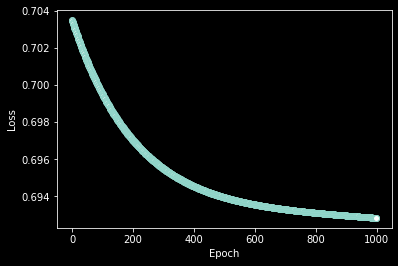

In [67]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [74]:
Perceptron.eval()
y_pred = Perceptron(X)
after_train = lossfun(y_pred, y) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.6928299069404602


## Using `tf.keras.layers.Dense`

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv('gender.csv')
print(data.shape)
data.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [6]:
sc = MinMaxScaler()

num = ['forehead_width_cm', 'forehead_height_cm']
data[num] = sc.fit_transform(data[num])
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0.097561,0.50,1,0,1,1,1
1,0,0.634146,0.15,0,0,1,0,0
2,0,0.097561,0.60,1,1,1,1,1
3,0,0.731707,0.50,0,1,1,1,1
4,1,0.512195,0.40,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.536585,0.00,0,0,0,0,0
4997,1,0.121951,0.15,0,0,0,0,0
4998,1,0.365854,0.30,0,0,0,0,0
4999,1,0.439024,0.55,0,0,0,0,0


In [15]:
X = data.iloc[:, :data.shape[1]-1].values
y = data.iloc[:, data.shape[1]-1:].values

In [19]:
model = Sequential()
model.add(Dense(1, input_shape=(7,), activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X, y, batch_size=25, epochs=75, verbose=2, validation_split=0.2)

Epoch 1/75
160/160 - 0s - loss: 0.0965 - accuracy: 0.9635 - val_loss: 0.1139 - val_accuracy: 0.9690
Epoch 2/75
160/160 - 0s - loss: 0.0962 - accuracy: 0.9645 - val_loss: 0.1134 - val_accuracy: 0.9690
Epoch 3/75
160/160 - 0s - loss: 0.0960 - accuracy: 0.9643 - val_loss: 0.1130 - val_accuracy: 0.9690
Epoch 4/75
160/160 - 0s - loss: 0.0957 - accuracy: 0.9650 - val_loss: 0.1126 - val_accuracy: 0.9680
Epoch 5/75
160/160 - 0s - loss: 0.0954 - accuracy: 0.9655 - val_loss: 0.1122 - val_accuracy: 0.9690
Epoch 6/75
160/160 - 0s - loss: 0.0938 - accuracy: 0.9638 - val_loss: 0.0993 - val_accuracy: 0.9720
Epoch 7/75
160/160 - 0s - loss: 0.0923 - accuracy: 0.9657 - val_loss: 0.0996 - val_accuracy: 0.9720
Epoch 8/75
160/160 - 0s - loss: 0.0922 - accuracy: 0.9655 - val_loss: 0.0998 - val_accuracy: 0.9710
Epoch 9/75
160/160 - 0s - loss: 0.0922 - accuracy: 0.9655 - val_loss: 0.0998 - val_accuracy: 0.9710
Epoch 10/75
160/160 - 0s - loss: 0.0922 - accuracy: 0.9657 - val_loss: 0.0994 - val_accuracy: 0.9720

In [24]:
model.evaluate(X, y)

157/157 [==============================] - 1s 7ms/step - loss: 0.0958 - accuracy: 0.9696


[0.09584224224090576, 0.9696061015129089]